In [5]:
 pip install pvlib

Note: you may need to restart the kernel to use updated packages.


# CALCULATION OF GHI AND POA


In [2]:
from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# for this example, we will be using Golden, Colorado
tz= 'MST'
lat, lon= 39.755, -105.221

In [9]:
site= location.Location(lat,lon, tz=tz)

In [4]:
def get_irradiance(site_location, date, tilt, surface_azimuth):
    times= pd.date_range(date, freq='10min', periods= 6*24, tz= site_location.tz)
    clearsky= site_location.get_clearsky(times)
    solar_position= site_location.get_solarposition(times=times)
    POA_irradiance= irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni= clearsky['dni'],
        ghi= clearsky['ghi'],
        dhi= clearsky['dhi'],
        solar_zenith= solar_position['apparent_zenith'],
        solar_azimuth= solar_position['azimuth'])
    return pd.DataFrame({'GHI': clearsky['ghi'],
                          'POA':POA_irradiance['poa_global']})

    

In [28]:
#Assuming 25 degree tilt and a south facing array
summer_irradiance= get_irradiance(site,'6-20-2020',25,180)
winter_irradiance= get_irradiance(site,'12-21-2020',25,180)



In [29]:
#Convert dataframe indexes to Hour:Minute format to make plotting easier
summer_irradiance.index= summer_irradiance.index.strftime('%H:%M')
winter_irradiance.index= winter_irradiance.index.strftime('%H:%M')


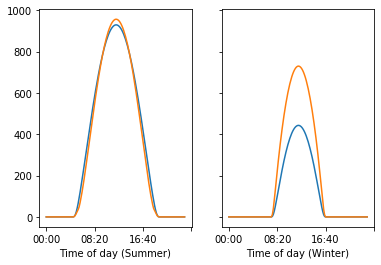

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
summer_irradiance['GHI'].plot(ax=ax1,label='GHI')
summer_irradiance['POA'].plot(ax=ax1,label='POA')
winter_irradiance['GHI'].plot(ax=ax2)
winter_irradiance['POA'].plot(ax=ax2)
ax1.set_xlabel('Time of day (Summer)')
ax2.set_xlabel('Time of day (Winter)')

plt.show()
